In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# prompt: Data preprocessing for BCSS breast cancer semantic segmentation data in the drive under BCSS directory.

import os
import cv2
import numpy as np
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define paths
data_dir = "/content/drive/MyDrive/BCSS/BCSS"  # Replace with your actual path
images_dir = os.path.join(data_dir, "/content/drive/MyDrive/BCSS/BCSS/test")
masks_dir = os.path.join(data_dir, "/content/drive/MyDrive/BCSS/BCSS/train_mask")

# Image preprocessing parameters
image_size = (256, 256)  # Adjust as needed

def preprocess_image(image_path):
  """Loads and preprocesses a single image."""
  img = cv2.imread(image_path)
  img = cv2.resize(img, image_size)
  img = img.astype(np.float32) / 255.0  # Normalize to [0, 1]
  return img

def preprocess_mask(mask_path):
  """Loads and preprocesses a single mask."""
  mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
  mask = cv2.resize(mask, image_size, interpolation=cv2.INTER_NEAREST)  # Important: Use nearest-neighbor interpolation for masks
  mask = mask.astype(np.uint8)  # Ensure mask is uint8
  return mask

# Preprocess all images and masks
preprocessed_images = []
preprocessed_masks = []

image_filenames = sorted(os.listdir(images_dir))
mask_filenames = sorted(os.listdir(masks_dir))

for image_filename, mask_filename in zip(image_filenames, mask_filenames):
  if image_filename.endswith(('.jpg', '.jpeg', '.png')) and mask_filename.endswith(('.jpg', '.jpeg', '.png')):
    image_path = os.path.join(images_dir, image_filename)
    mask_path = os.path.join(masks_dir, mask_filename)

    try:
        img = preprocess_image(image_path)
        mask = preprocess_mask(mask_path)

        preprocessed_images.append(img)
        preprocessed_masks.append(mask)

    except Exception as e:
        print(f"Error processing {image_filename}: {e}")

# Convert lists to numpy arrays
preprocessed_images = np.array(preprocessed_images)
preprocessed_masks = np.array(preprocessed_masks)

print(f"Preprocessed images shape: {preprocessed_images.shape}")
print(f"Preprocessed masks shape: {preprocessed_masks.shape}")

# Example: Save preprocessed data (optional)
# np.save("preprocessed_images.npy", preprocessed_images)
# np.save("preprocessed_masks.npy", preprocessed_masks)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Preprocessed images shape: (4021, 256, 256, 3)
Preprocessed masks shape: (4021, 256, 256)


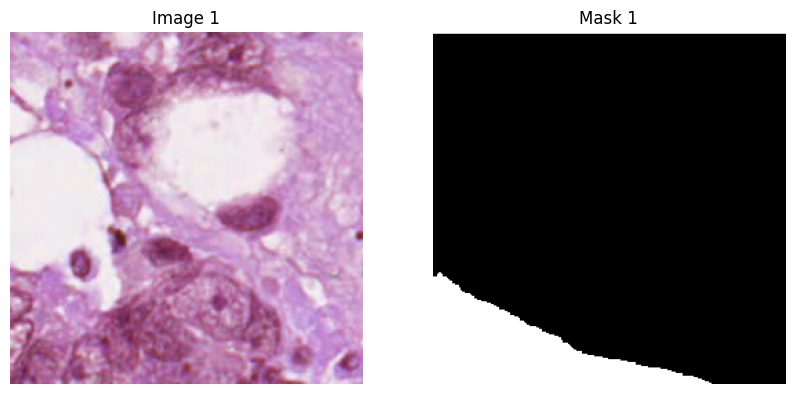

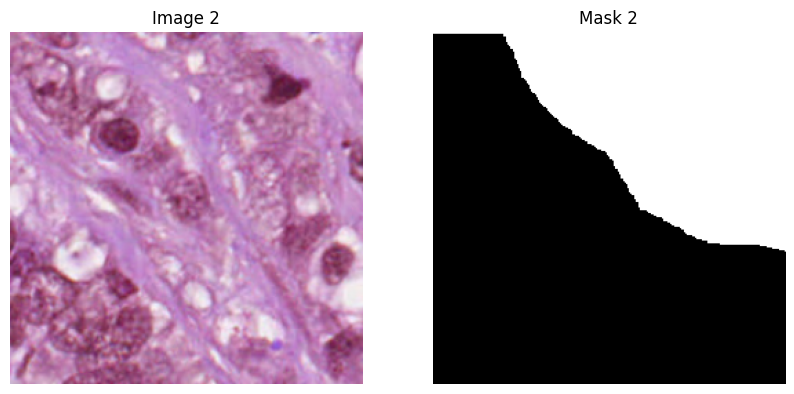

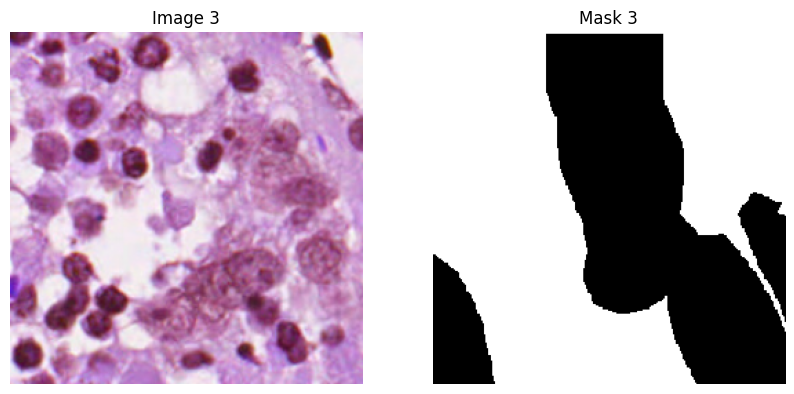

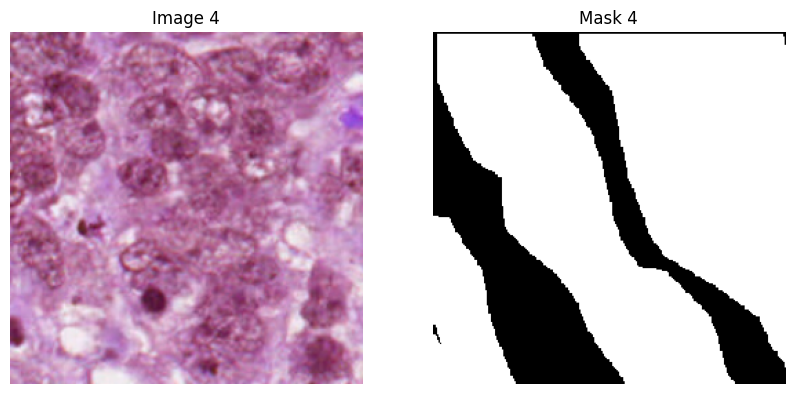

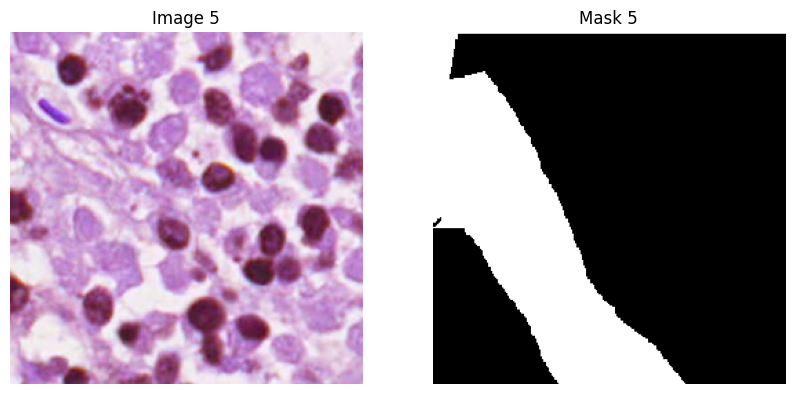

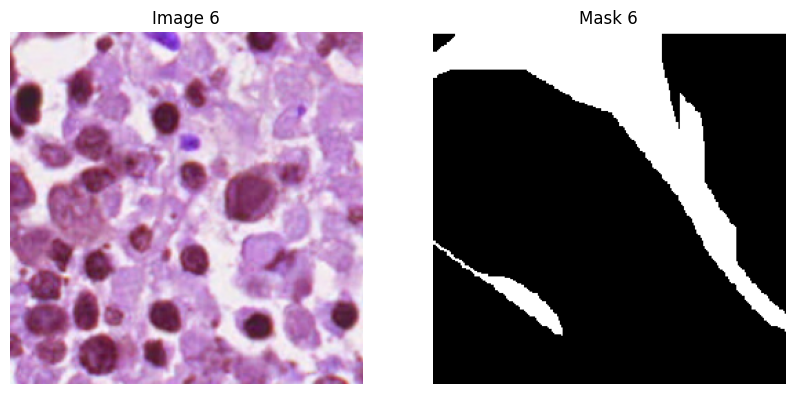

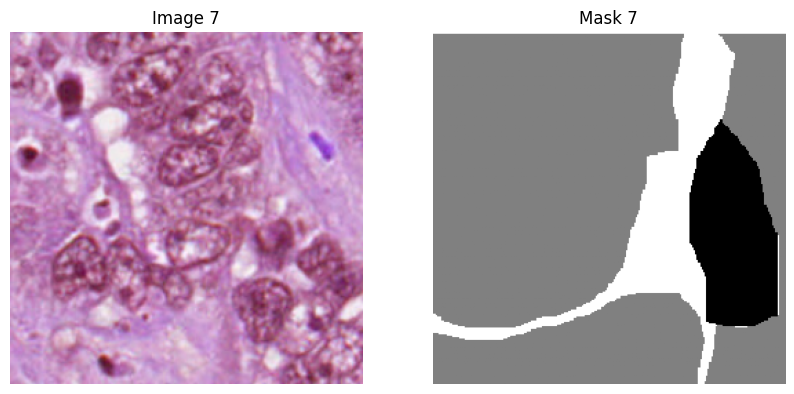

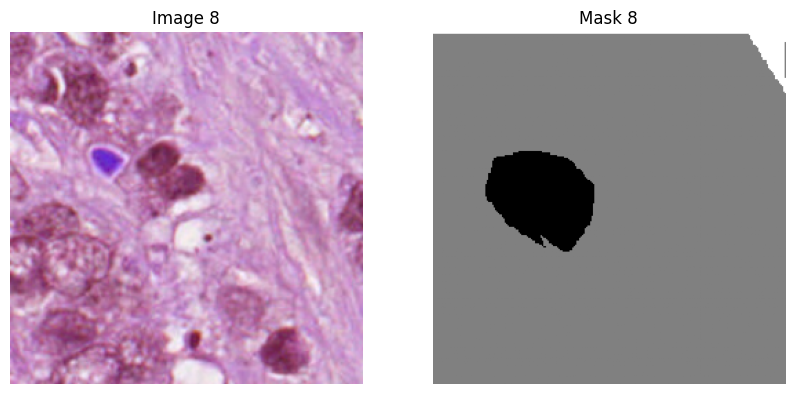

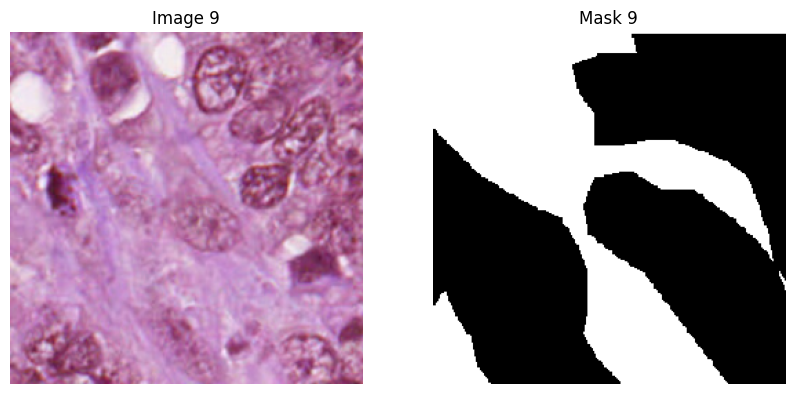

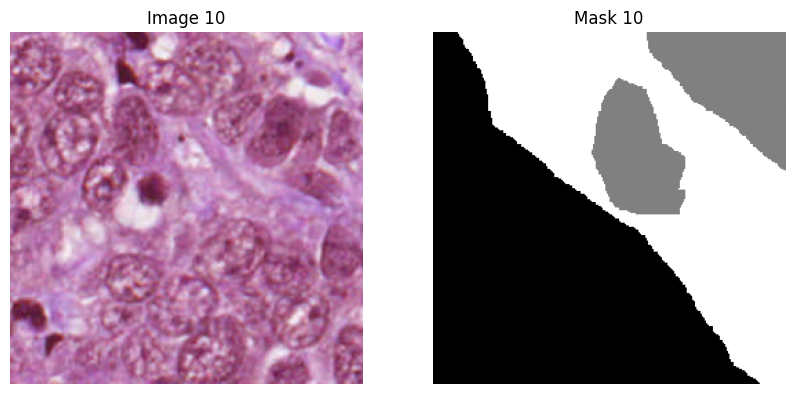

In [ ]:
# prompt: start plotting the preprocessed data

import matplotlib.pyplot as plt

# Assuming preprocessed_images and preprocessed_masks are already defined from the previous code

# Plot a few examples
num_examples_to_plot = 10  # Adjust as needed

for i in range(num_examples_to_plot):
  fig, axes = plt.subplots(1, 2, figsize=(10, 5))

  axes[0].imshow(preprocessed_images[i])
  axes[0].set_title(f"Image {i+1}")
  axes[0].axis('off')

  axes[1].imshow(preprocessed_masks[i], cmap='gray') # Use grayscale colormap for masks
  axes[1].set_title(f"Mask {i+1}")
  axes[1].axis('off')

  plt.show()


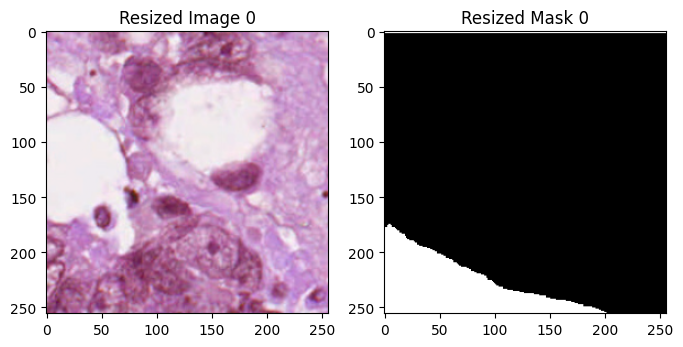

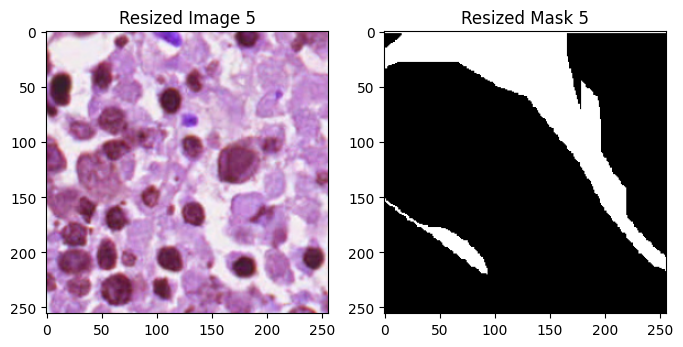

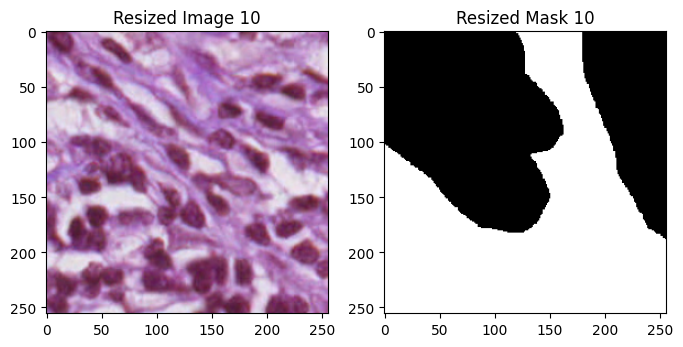

In [ ]:
# prompt: Resize image and mask

# Assuming preprocessed_images and preprocessed_masks are already defined from the previous code

# Example: Displaying resized images and masks
import matplotlib.pyplot as plt

# Choose a few indices to display
indices_to_display = [0, 5, 10]  # Example indices

for i in indices_to_display:
    # Display the image
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(preprocessed_images[i])
    plt.title(f"Resized Image {i}")

    # Display the mask
    plt.subplot(1, 2, 2)
    plt.imshow(preprocessed_masks[i], cmap='gray')  # Use 'gray' colormap for masks
    plt.title(f"Resized Mask {i}")
    plt.show()


In [5]:
from torchvision import transforms
from PIL import Image
import os
import torch
''' BCSS dataset masks_orig has 22 different classes of cells 
outside_roi	            0
tumor	                1
stroma	                2
lymphocytic_infiltrate	3
necrosis_or_debris	    4
glandular_secretions	5
blood	                6
exclude	                7
metaplasia_NOS	        8
fat	                    9
plasma_cells	        10
other_immune_infiltrate	11
mucoid_material	        12
normal_acinus_or_duct	13
lymphatics	            14
undetermined	        15
nerve	                16
skin_adnexa	            17
blood_vessel	        18
angioinvasion	        19
dcis	                20
other	                21

Convert it to 2 classes
no tumor                0
tumor                   1
'''
in_folder = "../data/BCSS_small/train/masks_orig/"
out_folder = "../data/BCSS_small/train/masks/"
overwrite = False

_mask_transformer = transforms.Compose([
    transforms.PILToTensor()
])
_image_transformer = transforms.Compose([
    transforms.ToPILImage()
])

def process_and_save_mask(image_file):
    mask = Image.open(os.path.join(in_folder,image_file))
    mask_tensor = _mask_transformer(mask)
    mask_tensor = (mask_tensor == 1).to(torch.uint8) # convert to 0/1 mask
    mask_image = _image_transformer(mask_tensor)
    os.makedirs(os.path.join(out_folder), exist_ok=True)
    mask_image.save(os.path.join(out_folder, image_file))

in_masks = [file for file in os.listdir(in_folder) if file.endswith('.png')]
for image_file in in_masks:
    if os.path.isfile(os.path.join(out_folder, image_file)) and not overwrite:
        continue
    process_and_save_mask(image_file)

In [6]:
in_masks

['TCGA-A1-A0SK-DX1_xmin45749_ymin25055_MPP-0_0_2016_size224.png',
 'TCGA-A1-A0SK-DX1_xmin45749_ymin25055_MPP-0_0_2240_size224.png',
 'TCGA-A1-A0SK-DX1_xmin45749_ymin25055_MPP-0_224_2016_size224.png',
 'TCGA-A1-A0SK-DX1_xmin45749_ymin25055_MPP-0_224_2240_size224.png',
 'TCGA-A1-A0SK-DX1_xmin45749_ymin25055_MPP-0_448_1120_size224.png',
 'TCGA-A1-A0SK-DX1_xmin45749_ymin25055_MPP-0_448_1792_size224.png',
 'TCGA-A1-A0SK-DX1_xmin45749_ymin25055_MPP-0_448_672_size224.png',
 'TCGA-A1-A0SK-DX1_xmin45749_ymin25055_MPP-0_672_1568_size224.png']

In [7]:
mask = Image.open(os.path.join(in_folder,in_masks[0]))
mask_tensor = _mask_transformer(mask)
mask_tensor

tensor([[[2, 2, 2,  ..., 2, 2, 2],
         [2, 2, 2,  ..., 1, 1, 1],
         [2, 2, 2,  ..., 1, 1, 1],
         ...,
         [2, 2, 2,  ..., 2, 2, 2],
         [2, 2, 2,  ..., 2, 2, 2],
         [2, 2, 2,  ..., 2, 2, 2]]], dtype=torch.uint8)

In [8]:
mask_tensor.unique(return_counts=True)

(tensor([1, 2], dtype=torch.uint8), tensor([31460, 18716]))

In [9]:
mask = Image.open(os.path.join(out_folder,in_masks[0]))
mask_tensor = _mask_transformer(mask)
mask_tensor

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 1, 1, 1],
         [0, 0, 0,  ..., 1, 1, 1],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8)

In [10]:
mask_tensor.unique(return_counts=True)

(tensor([0, 1], dtype=torch.uint8), tensor([18716, 31460]))

In [11]:
model_name = "sam-vit_b-lora512"
pred_mask_folder = f"../data/Results/"
mask = Image.open(os.path.join(pred_mask_folder,model_name,in_masks[0]))
mask_tensor = _mask_transformer(mask)
mask_tensor

tensor([[[0, 0, 0,  ..., 1, 1, 1],
         [0, 0, 0,  ..., 1, 1, 1],
         [0, 0, 0,  ..., 1, 1, 1],
         ...,
         [0, 1, 1,  ..., 0, 0, 0],
         [0, 1, 1,  ..., 0, 0, 0],
         [0, 1, 1,  ..., 0, 0, 0]]], dtype=torch.uint8)

In [12]:
mask_tensor.unique(return_counts=True)

(tensor([0, 1], dtype=torch.uint8), tensor([17557, 32619]))

In [31]:
in_masks[1]

'TCGA-A1-A0SK-DX1_xmin45749_ymin25055_MPP-0_0_2240_size224.png'